Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing.

In [2]:
dataset = pd.read_csv('/content/train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset['Survived'].value_counts()
''' 0 --> Non-Survived
    1 --> Survived'''

,count
Survived,
0,549
1,342


In [9]:
dataset['Sex'].value_counts()

,count
Sex,
male,577
female,314


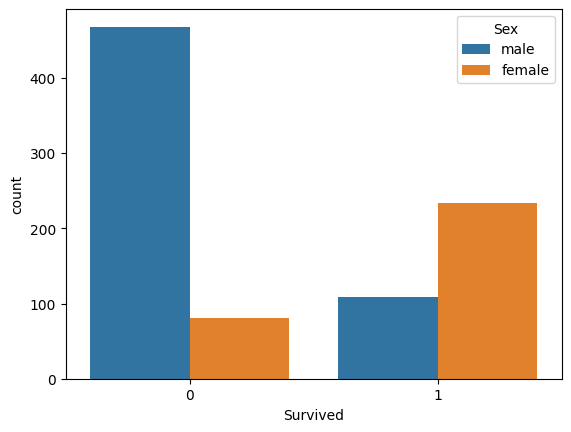

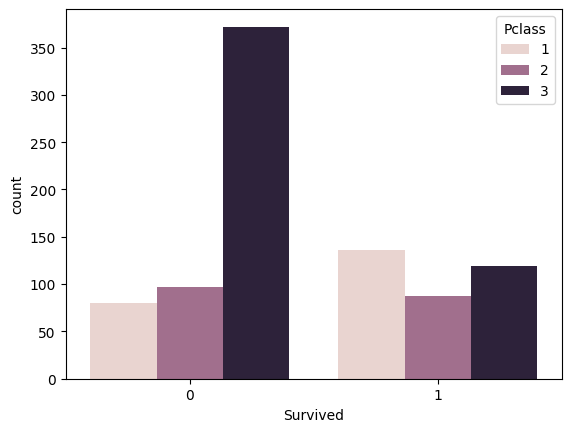

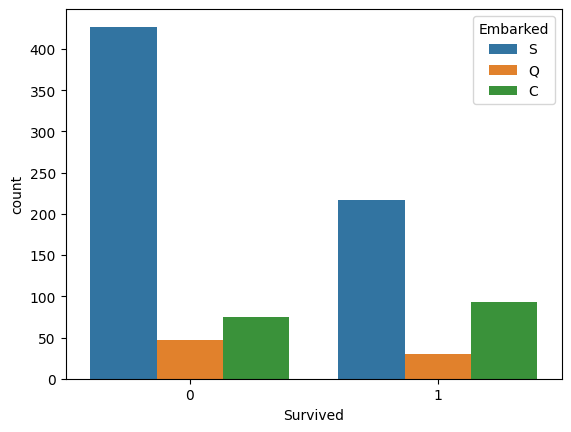

In [16]:
sb.countplot(x = 'Survived', hue = 'Sex', data = dataset)
plt.show()

sb.countplot(x = 'Survived', hue = 'Pclass', data = dataset)
plt.show()

sb.countplot(x = 'Survived', hue = 'Embarked', data = dataset)
plt.show()

In [17]:
dataset.shape

(891, 12)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling the Missing values.

In [21]:
'''Majority of the values in the cabin column is missing and we can not feed the
null value to the dataset. Hence we drop the Cabin Column.'''

dataset = dataset.drop(columns = 'Cabin', axis = 1)

In [22]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
dataset.shape

(891, 11)

In [25]:
# Replacing the missing values in the column "Age" with its mean value.
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age, inplace = True)

<ipython-input-25-32b45a300226>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(mean_age, inplace = True)


In [26]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
''' For handling the missing values of "Embarked" column we will find which value is repeated maximum number of times
and replace the missing values with it.'''

dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [28]:
''' As we can see the value "S" is repeated maximum number of times so we will replace the missing values with it.'''

dataset['Embarked'].fillna('S', inplace = True)

<ipython-input-28-cb86e0383a85>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Embarked'].fillna('S', inplace = True)


In [32]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
dataset.shape

(891, 11)

Data Analysis.

In [34]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Encoding the Categorical Columns.

In [35]:
''' Replacing 'male' --> 0, 'female' --> 1 for the "Sex" column
    Replacing 'S' --> 0, 'C' --> 1, 'Q' --> 2 for the "Embarked" column'''

dataset['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
dataset['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)

<ipython-input-35-b75ff080db59>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
<ipython-input-35-b75ff080db59>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
<ipy

In [36]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Seperating the features and the target columns.

In [37]:
X = dataset.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)
Y = dataset['Survived']

In [38]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into the training and the testing data.

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2, stratify = Y)

In [52]:
Y_train.head()

,Survived
847,0
822,0
27,0
433,0
300,1


In [47]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
847,3,0,35.000000,0,0,7.8958,1
822,1,0,38.000000,0,0,0.0000,0
27,1,0,19.000000,3,2,263.0000,0
433,3,0,17.000000,0,0,7.1250,0
300,3,1,29.699118,0,0,7.7500,2


In [53]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
90,3,0,29.000000,0,0,8.0500,0
736,3,1,48.000000,1,3,34.3750,0
48,3,0,29.699118,2,0,21.6792,1
783,3,0,29.699118,1,2,23.4500,0
404,3,1,20.000000,0,0,8.6625,0


In [54]:
Y_test.head()

,Survived
90,0
736,0
48,0
783,0
404,0


In [41]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [42]:
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (712,) (179,)


Building the model for making the prediction.

In [43]:
model = LogisticRegression()

In [45]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation Step.

In [46]:
''' Checking the accuracy score of our model on the train and the test data.'''

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f'Accuracy on the training data : {training_data_accuracy}')

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Accuracy on the testing data : {testing_data_accuracy}')

Accuracy on the training data : 0.800561797752809
Accuracy on the testing data : 0.7932960893854749


Making a Predictive System.

In [56]:
input_data = (3,0,34.5,0,0,7.8292,2)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person will not survive')
else:
  print('The person will survive')

[0]
The person will not survive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
